<a href="https://colab.research.google.com/github/kevinhaube/mta-expansion/blob/main/Maryland_Count_to_Couty_Work_Commute_by_Resident_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Census 2020 Employee Commutes by Resident County

The goal is to isolate our state's (Maryland's) employee commute by resident county to employment county, and create a readable table of values we can further visualize in an effort to determine suitable locations for MTA rail expansions.

## Step 1: Import and take stock

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./census-commute.csv", skiprows=0, header=1, low_memory=False)
df.head()

,State FIPS Code,County FIPS Code,State Name,County Name,State FIPS Code.1,County FIPS Code.1,State Name.1,County Name.1,Workers in Commuting Flow,Margin of Error
0,01,1.0,Alabama,Autauga County,1.0,1.0,Alabama,Autauga County,"8,671",681
1,01,1.0,Alabama,Autauga County,1.0,3.0,Alabama,Baldwin County,8,12
2,01,1.0,Alabama,Autauga County,1.0,7.0,Alabama,Bibb County,11,19
3,01,1.0,Alabama,Autauga County,1.0,13.0,Alabama,Butler County,9,17
4,01,1.0,Alabama,Autauga County,1.0,21.0,Alabama,Chilton County,508,195


In [4]:
df.dtypes

State FIPS Code               object
County FIPS Code             float64
State Name                    object
County Name                   object
State FIPS Code.1            float64
County FIPS Code.1           float64
State Name.1                  object
County Name.1                 object
Workers in Commuting Flow     object
Margin of Error               object
dtype: object

## Step 2: Cleaning & Isolation of Maryland Data

I noticed there were commas in some of the numeric values, and integers are all showing as `object` rather than `int64`, so below we do a few standard operations such as dropping null values as well as specifics like column name changes and comma removal.

In [5]:
# Drop rows with any null values
df.dropna(inplace=True)

# Manual fixes
df.replace(",", "", regex=True, inplace=True)
df.rename(columns={'County Name': 'County of Residence', 'County Name.1': 'County of Employment'}, inplace=True)

# Convert columns to appropriate data types
for column in df.columns:
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:
        df[column] = df[column].astype(str)

# Filter the dataframe to only include rows where State Name is Maryland
df_maryland = df[((df['State Name'] == 'Maryland') |
    (df['State Name'] == 'District of Columbia')) &
    ((df['State Name.1'] == 'Maryland') |
    (df['State Name.1'] == 'District of Columbia'))]

# Display cleaned data types and the first few rows of the Maryland data
df_maryland.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 12307 to 45097
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State FIPS Code            421 non-null    int64  
 1   County FIPS Code           421 non-null    float64
 2   State Name                 421 non-null    object 
 3   County of Residence        421 non-null    object 
 4   State FIPS Code.1          421 non-null    float64
 5   County FIPS Code.1         421 non-null    float64
 6   State Name.1               421 non-null    object 
 7   County of Employment       421 non-null    object 
 8   Workers in Commuting Flow  421 non-null    int64  
 9   Margin of Error            421 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 36.2+ KB


In [6]:
df_maryland.head()

,State FIPS Code,County FIPS Code,State Name,County of Residence,State FIPS Code.1,County FIPS Code.1,State Name.1,County of Employment,Workers in Commuting Flow,Margin of Error
12307,11,1.0,District of Columbia,District of Columbia,11.0,1.0,District of Columbia,District of Columbia,291069,3596
12326,11,1.0,District of Columbia,District of Columbia,24.0,3.0,Maryland,Anne Arundel County,1090,224
12327,11,1.0,District of Columbia,District of Columbia,24.0,5.0,Maryland,Baltimore County,293,117
12328,11,1.0,District of Columbia,District of Columbia,24.0,9.0,Maryland,Calvert County,41,57
12329,11,1.0,District of Columbia,District of Columbia,24.0,17.0,Maryland,Charles County,377,178


## Step 3: Make it Digestible

There's evidently a pattern of one observation for one county-to-county pairing, which indicates a need for a pivot table. Taking the resident county as the index makes the most sense with how the census data is structured, and for our intended future use of planning most appropriate rail lines and stations.

In [7]:
md_commute_pivot = pd.pivot_table(df_maryland,
                             index='County of Residence',
                             columns='County of Employment',
                             values='Workers in Commuting Flow',
                             aggfunc='sum')
md_commute_pivot.fillna(0, inplace=True)
md_commute_pivot = md_commute_pivot.astype(int)
md_commute_pivot

County of Employment,Allegany County,Anne Arundel County,Baltimore County,Baltimore city,Calvert County,Caroline County,Carroll County,Cecil County,Charles County,District of Columbia,...,Kent County,Montgomery County,Prince George's County,Queen Anne's County,Somerset County,St. Mary's County,Talbot County,Washington County,Wicomico County,Worcester County
County of Residence,,,,,,,,,,,,,,,,,,,,,
Allegany County,22788,18,31,16,0,0,0,0,10,10,...,0,75,41,0,0,0,0,455,0,0
Anne Arundel County,7,181231,12197,22866,1044,134,251,122,537,18362,...,72,8203,26613,951,36,203,167,8,16,51
Baltimore County,41,24902,213487,115079,28,0,4851,546,13,4994,...,9,4401,6000,75,66,93,0,133,25,59
Baltimore city,67,15594,58783,171128,44,0,707,53,18,5356,...,10,2879,3249,15,22,10,38,14,4,0
Calvert County,0,2332,343,137,20685,0,0,0,1412,4641,...,0,1060,8763,0,0,4592,11,0,0,0
Caroline County,0,942,130,235,13,6598,17,24,0,167,...,467,27,382,1485,6,0,3163,0,228,12
Carroll County,0,4162,14037,5928,18,0,40679,0,26,746,...,0,3807,1649,0,0,0,0,142,0,50
Cecil County,0,201,1237,1122,0,0,0,23056,0,60,...,243,86,81,90,0,0,22,10,0,0
Charles County,0,1361,189,450,746,6,0,0,32187,14819,...,0,1399,16049,0,0,3190,36,0,21,0


# Step 4: Plot and observe

To better view strong relationships ripe for inter-county transit, we can display them as a heatmap.

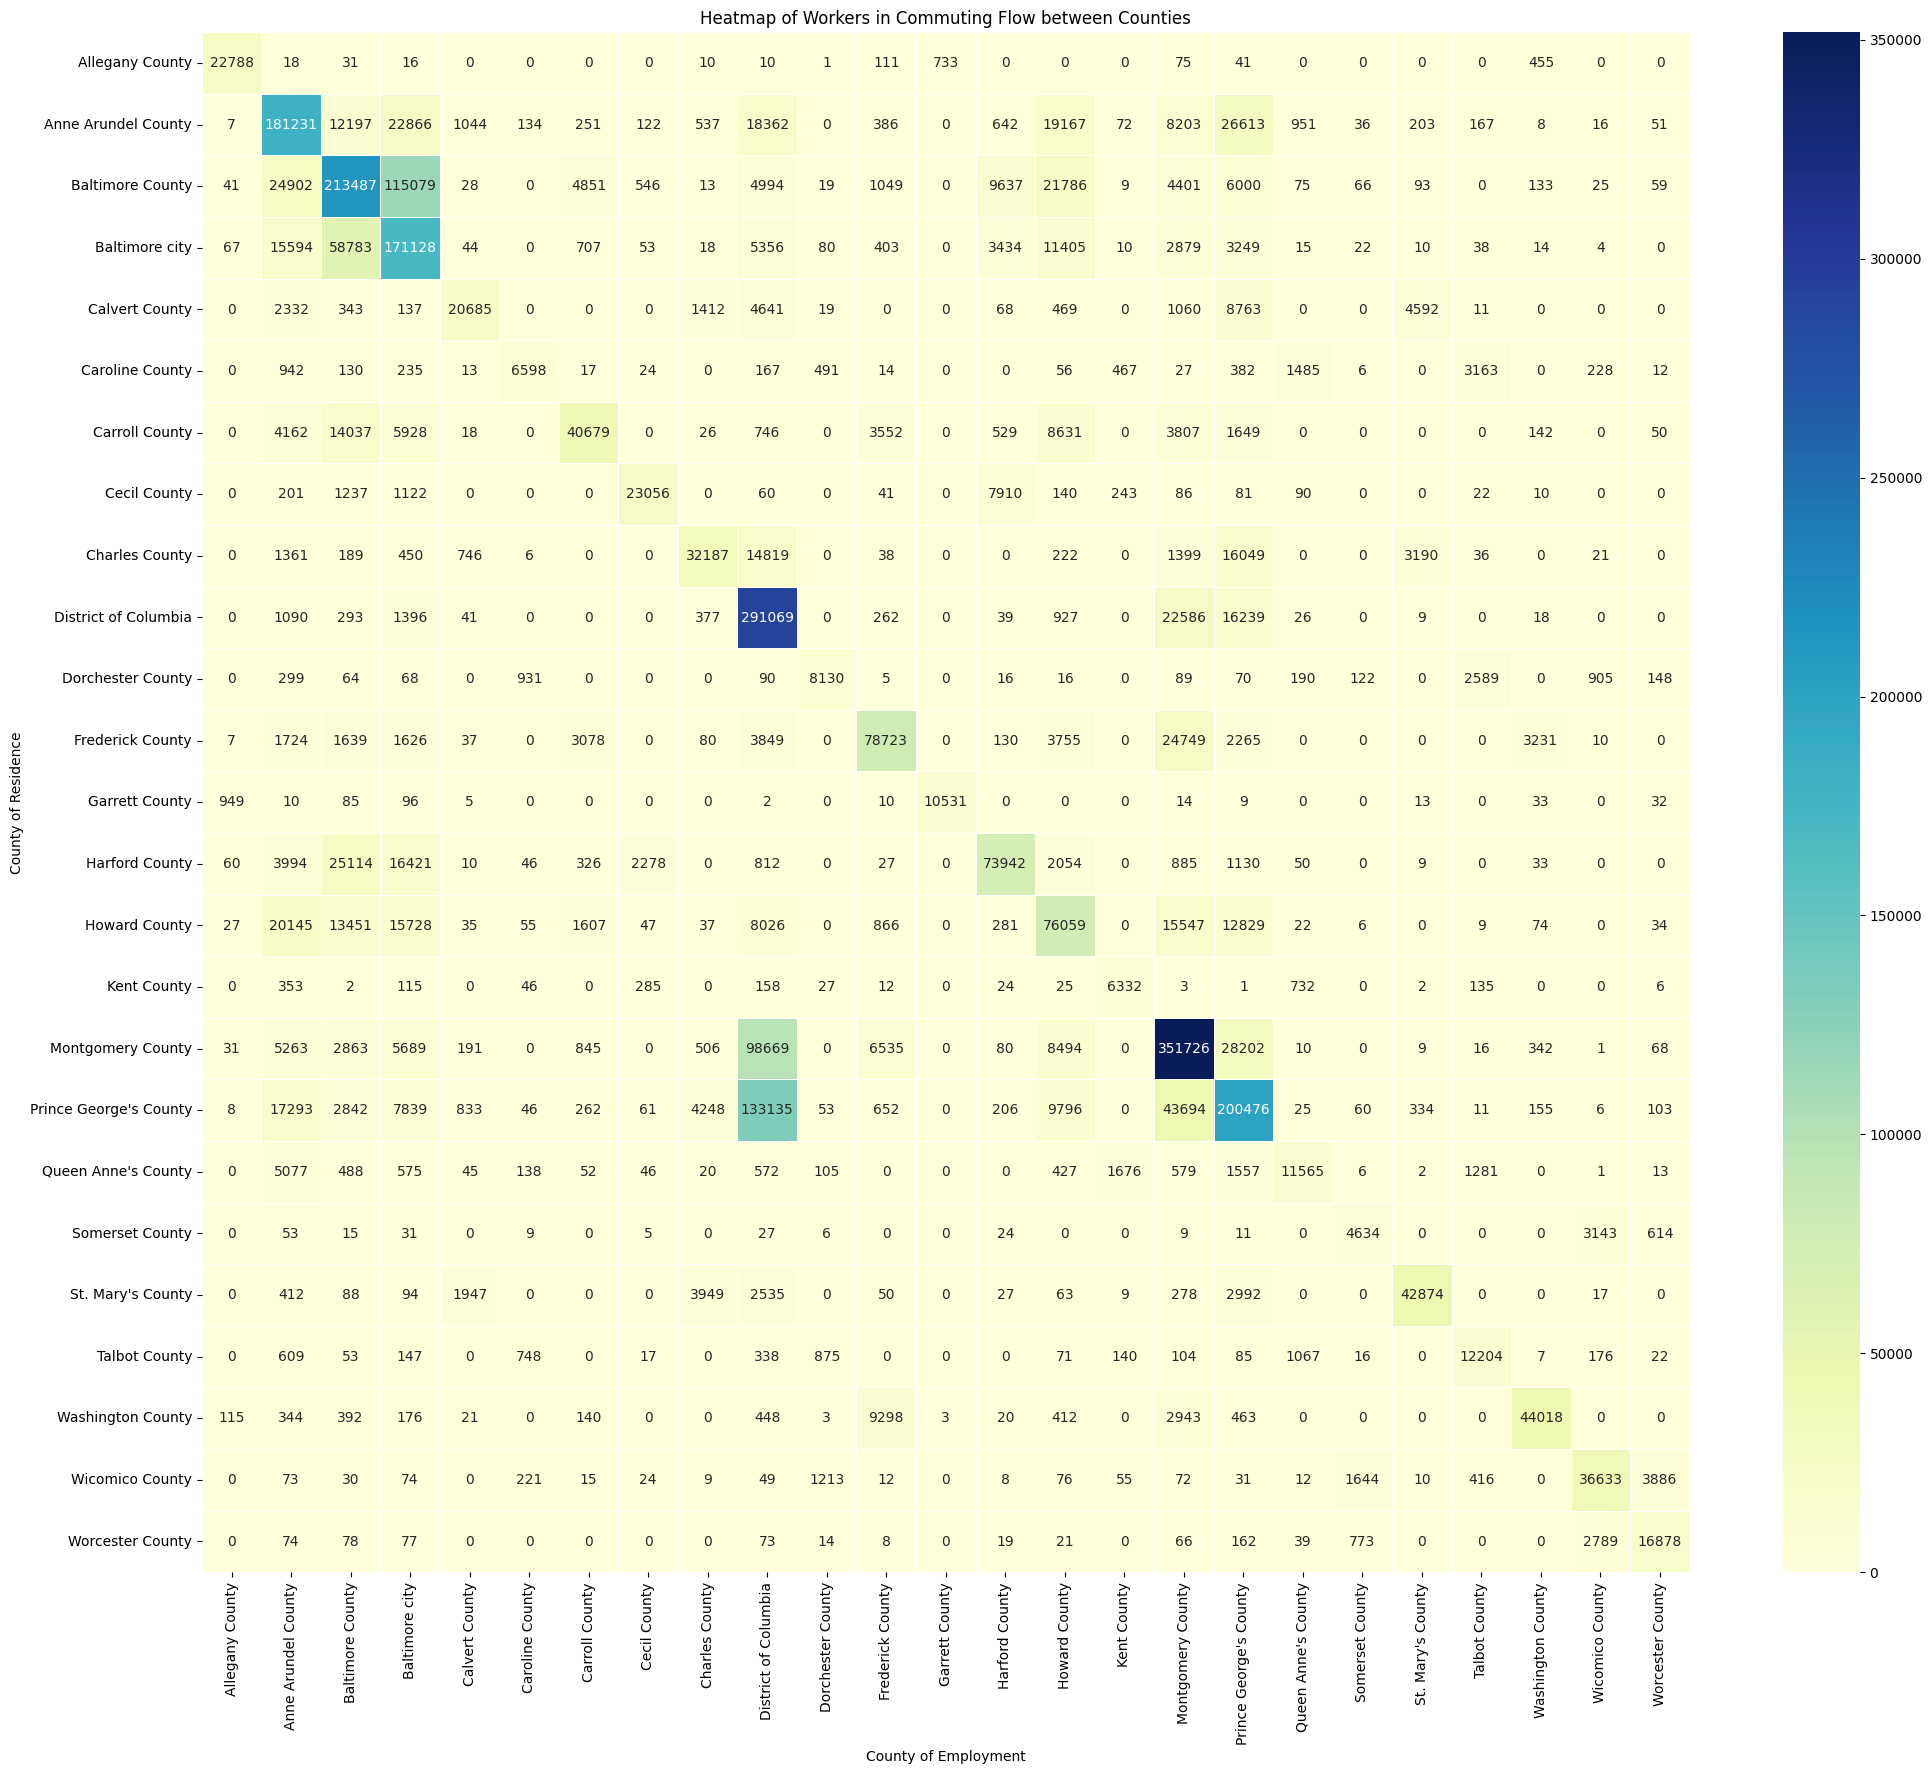

In [8]:
plt.figure(figsize=(24, 20))
sns.heatmap(md_commute_pivot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Workers in Commuting Flow between Counties')
plt.xlabel('County of Employment')
plt.ylabel('County of Residence')
plt.show()

The heatmap above is a bit expansive, but we can isolate counties between Baltimore City and DC, along with  to better focus on areas served by the MTA and WMATA already; namely Anne Arundel County, Baltimore City and County, Montgomery County, Prince George's County, and DC.

Adding in bordering counties, as well, will show unserved needs that may exist; Frederick County, Carroll County, and Howard County.

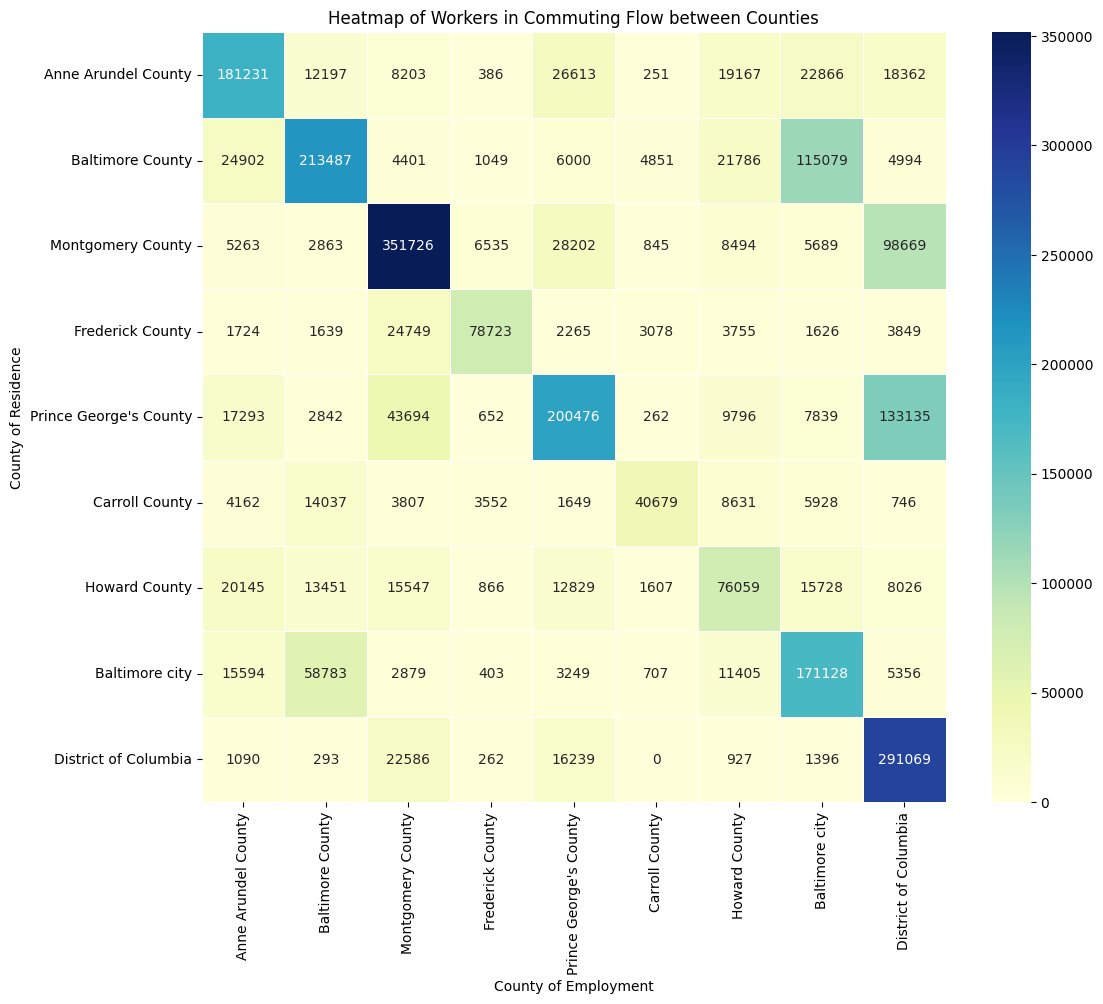

In [9]:
selected_counties = ["Anne Arundel County", "Baltimore County", "Montgomery County",
                     "Frederick County", "Prince George's County", "Carroll County",
                     "Howard County", "Baltimore city", "District of Columbia"]
md_commute_core_pivot = md_commute_pivot.loc[selected_counties, selected_counties]

plt.figure(figsize=(12, 10))
sns.heatmap(md_commute_core_pivot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Workers in Commuting Flow between Counties')
plt.xlabel('County of Employment')
plt.ylabel('County of Residence')
plt.show()